## 3.2.3　MA（移動平均）モデルの原理

・移動平均モデル：ある時点の出力が、過去や現在のホワイトノイズの線形和として表される

・MAモデルは、基本的に定常性のあるデータにしか適用できないので、事前に定常性検定をする必要がある

In [1]:
import io
import requests
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [2]:
content = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True, dtype='float')
content

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [3]:
content = content.rename(columns={'#Passengers': 'passengers'})

print(content.shape)
content.head(10)

(144, 1)


,passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [4]:
pd.DataFrame([['Month', '月'],
              ['passenger', '飛行機の乗客数']],
              columns=['カラム', '意味'])

,カラム,意味
0,Month,月
1,passenger,飛行機の乗客数


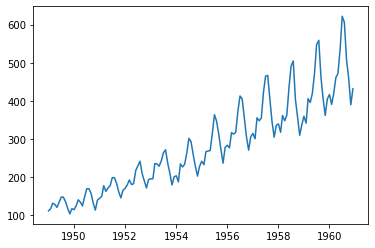

In [5]:
passengers = content['passengers']

plt.plot(passengers)
plt.show()

・自己相関（ACF）：$y(t)$ と $y(t-h)$　の間のすべてのデータを介して相関を計算<br>
・偏自己相関（PACF）：$y(t)$ と $y(t-h)$　の2のデータのみで相関を計算

・ADF検定（Augmented Dicky-Fuller test）を行う

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


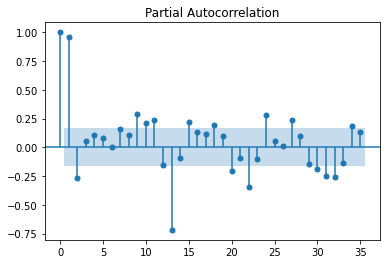

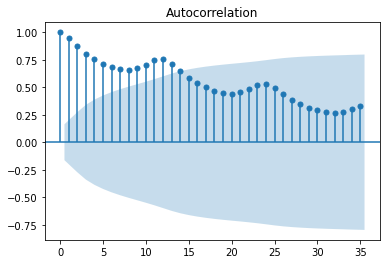

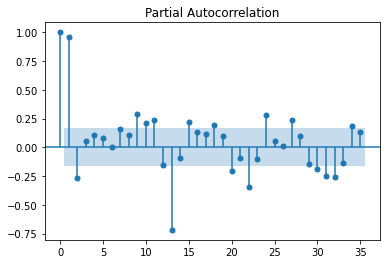

In [6]:
result = sm.tsa.stattools.adfuller(passengers)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
sm.graphics.tsa.plot_acf(passengers, lags=35)
sm.graphics.tsa.plot_pacf(passengers, lags=35)

・p値が非常に大きいので、データは非定常性をもつことが示される<br>
・ADF統計値は、すべての臨界値（Critical Value）より大きいので、非定常性であることが示唆される

・ホワイトノイズ：正規乱数ノイズ

・月ごとの飛行機の乗客数なので、ラグ1で大きな正の相関がある<br>
・つまり、先月の乗客数が多ければ今月も多くなる傾向がある（先月と今月のデータが正の相関という意味である）

In [7]:
MA_order= sm.tsa.arma_order_select_ic(passengers, max_ar=0, max_ma=4, ic=['aic','bic'])
print ('order is', MA_order)

D:\Users\113305A00BRB7\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Users\113305A00BRB7\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params 

order is {'aic':             0            1            2            3            4
0  1790.36758  1618.862527  1522.123131  1507.879324  1445.609662, 'bic':              0            1            2           3            4
0  1796.307207  1627.771967  1534.002384  1522.72839  1463.428542, 'aic_min_order': (0, 4), 'bic_min_order': (0, 4)}


・MAモデルの次数を1にする

In [9]:
MA = sm.tsa.ARMA(passengers, order=(0, 1)).fit()

D:\Users\113305A00BRB7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


・MAモデルの残差（予測値と実測値の差）に対する相関分析を行う

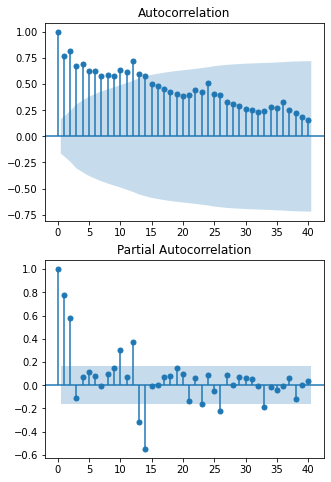

In [10]:
resid = MA.resid
fig = plt.figure(figsize=(5,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

・定常性のデータであれば、残差どうしに相関はない<br>
・上記のデータだと、残差どうしに相関が残っているので、非定常性のデータであるといえる

In [11]:
passengers[72:120].head()

Month
1955-01-01    242.0
1955-02-01    233.0
1955-03-01    267.0
1955-04-01    269.0
1955-05-01    270.0
Name: passengers, dtype: float64

In [12]:
passengers[72:120].tail()

Month
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
Name: passengers, dtype: float64

(array([-5479., -5298., -5114., -4932., -4748., -4567., -4383., -4202.,
        -4018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

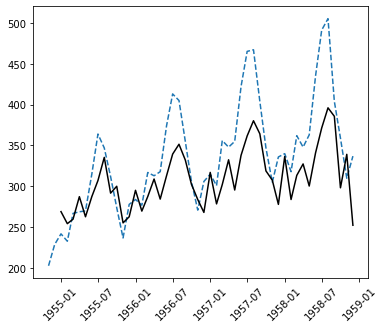

In [13]:
pred = MA.predict('1955-01-01', '1958-12-01')
plt.figure(figsize=(6,5))
plt.plot(passengers[70:120],'--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

・In-sample 法：学習データの範囲内で行う予測（上記）<br>
・Out-sample 法：学習データの範囲外で行う予測（下記）

・見せかけの回帰：上記のように、予測値がおおむね実測値の結果をそのまま写しているように見える現象

(array([-7305., -6575., -5844., -5114., -4383., -3653., -2922., -2192.,
        -1461.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

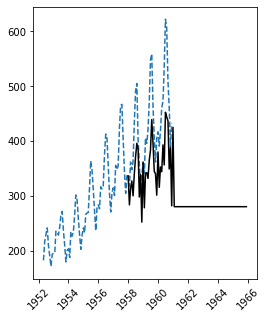

In [14]:
pred = MA.predict('1958-01-01', '1965-12-01')
plt.figure(figsize=(4,5))
plt.plot(passengers[40:],'--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

・上記に関しても、非定常性のデータに適応できない回帰モデルなので、上手く予測ができていない

・今回のデータは、下記のように時間とともに乗客数が増えていくというトレンドをもっている<br>
・そのトレンドによって、時系列データの平均値が一定にならないことが原因となっている

・共和分は、そのトレンドを微分の効果で除去することができる<br>
・そのため、共和分という前処理を行い、定常性をもつデータに変換する必要がある